In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

2017-08-23 is the most recent date.
2016-08-23 is the date one year in the future.


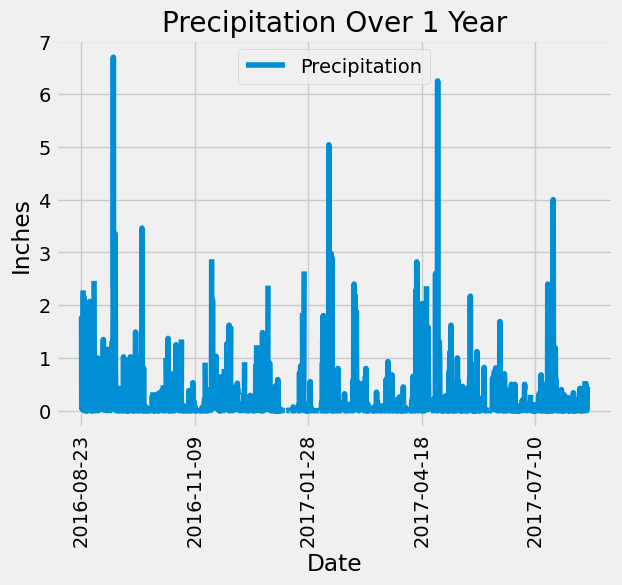

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print(f'{recent_date} is the most recent date.')

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f'{one_year} is the date one year in the future.')

# Perform a query to retrieve the data and precipitation scores
pre_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df_pre = pd.DataFrame(pre_data,columns=['Date','Precipitation']).set_index('Date')

# Sort the dataframe by date
df_pre_sort = df_pre.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
df_pre_sort.plot(y='Precipitation',use_index=True,title='Precipitation Over 1 Year',ylabel='Inches',xlabel='Date',rot=90)
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
stats = df_pre_sort.describe()
stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Measurement.station).group_by(Measurement.station).count()
total_stations

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc())

for row in activity:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = activity.first()[0]

lowest = session.query(Measurement.tobs, func.min(Measurement.tobs)).\
    filter(Measurement.station == most_active).first().tobs

highest = session.query(Measurement.tobs, func.max(Measurement.tobs)).\
    filter(Measurement.station == most_active).first().tobs

average = session.query(Measurement.tobs, func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).first().tobs
print(f"[({lowest}, {highest}, {average})]")

[(54.0, 85.0, 70.0)]


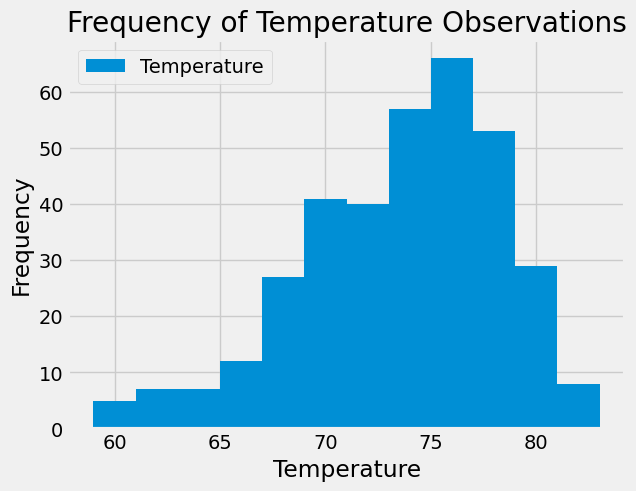

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active).\
    filter(Measurement.date >= one_year).all()

temp_df = pd.DataFrame(temp_data, columns=['Date','Temperature'])
temp_df.plot.hist(bins=12,title='Frequency of Temperature Observations')
plt.xlabel('Temperature')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()